In [1]:
import cmath
import numpy as np
import math
import sys
sys.path.append(r'E:\OneDrive\ENGINEERING\01-ENGINEERING TOOLS\engineering_library')
from LSODESolver import *
from RCLCircuits import *

def print_polar(n):
    print(cmath.polar(n)[0],'/__',360*cmath.polar(n)[1]/(2*cmath.pi),'deg')

def parallel(Zlist):
    ans = 0
    for i in Zlist:
        ans = ans + i**-1
    return ans**-1

def ComplexPolar(z,thetaDeg):
    return z*np.cos(math.radians(thetaDeg)) + z*np.sin(math.radians(thetaDeg))*1j

def Z_magnitude(n):
    return cmath.polar(n)[0]

def ComplexConjugate(N):
    return N.real - N.imag*1j

In [2]:
Z1 = 5
Z2  = 3+4j

print(parallel([Z1,Z2]))

(2.5+1.25j)


root1: (-0.33333333333333326+1.247219128924647j)
root2: (-0.33333333333333337-1.247219128924647j)
Under damped
Solution to the differential equation:
0.0 + ( 1.0 cos( 1.247219128924647 x ) +  0.26726124191242434 sin( 1.247219128924647 x ))e^( -0.33333333333333326 x )


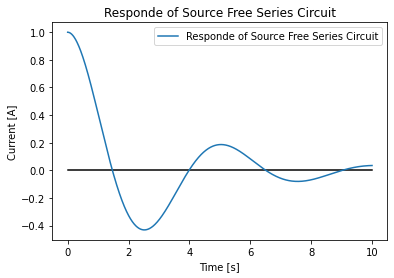

In [10]:
Q2 = RLCSF_Series_Circuit(20,30,0.02)
Q2.initial_conditions([0,1],[0,0])
Q2.plot(0,10)

In [9]:
Q3 = RLCSF_Parallel_Circuit(20,30,0.02)
Q3.initial_conditions([0,1],[0,0])
Q3.plot(0,10)

root1: (-1.25+0.3227486121839515j)
root2: (-1.25-0.3227486121839515j)
Under damped
Solution to the differential equation:
0.0 + ( 1.0 cos( 0.3227486121839515 x ) +  3.8729833462074157 sin( 0.3227486121839515 x ))e^( -1.25 x )


TypeError: plot_stack() got an unexpected keyword argument 'xlabel'

root1: (-0.25+0.19364916731037085j)
root2: (-0.25-0.19364916731037085j)
Under damped
Solution to the differential equation:
0.0 + ( 25.0 cos( 0.19364916731037085 x ) +  89.07861696277058 sin( 0.19364916731037085 x ))e^( -0.25 x )


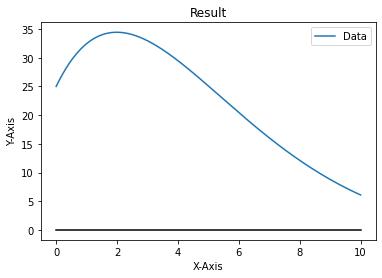

In [13]:
C1 = 1
C2 = 2

A = 5*C1*C2
B = 2*C2 + C1
C = 1

Q1v1 = LSODECC(A,B,C,0)
Q1v1.initial_conditions([0,25],[0,11])
Q1v1.plot(0,10)

In [19]:
import sympy as sp

t = sp.symbols('t')

V1 = ( 25.0 *sp.cos( 0.19364916731037085* t ) +  89.07861696277058 *sp.sin( 0.19364916731037085 *t ))*sp.exp( -0.25 *t) 
display(V1)

dV1dx = sp.diff(V1,t)
display(dV1dx)

(89.0786169627706*sin(0.193649167310371*t) + 25.0*cos(0.193649167310371*t))*exp(-0.25*t)

(-4.84122918275927*sin(0.193649167310371*t) + 17.25*cos(0.193649167310371*t))*exp(-0.25*t) - 0.25*(89.0786169627706*sin(0.193649167310371*t) + 25.0*cos(0.193649167310371*t))*exp(-0.25*t)

In [21]:
V2 =sp.simplify( 2*V1 + 2*C1*dV1dx)
display(V2)

(123.935467078637*sin(0.193649167310371*t) + 72.0*cos(0.193649167310371*t))*exp(-0.25*t)

In [24]:
a = 6
b = 1

div = (b*20j+1+a/(20j))
ans = ComplexPolar(30,30)

print_polar(div)
print_polar(ans)

print_polar(ans/div)

19.725364381932213 /__ 87.09407900034667 deg
30.0 /__ 29.999999999999996 deg
1.520884452075269 /__ -57.09407900034667 deg


In [27]:
P = 90
theta = 35

hyp = P/np.cos(math.radians(theta))

S = ComplexPolar(hyp,theta)
V = ComplexPolar(10,0)

I = ComplexConjugate(S/V)

Z = V/I
print(Z)

(0.7455667462920381+0.5220514559921714j)


In [28]:
pf = P/hyp
print(pf)

0.8191520442889918


In [31]:
print_polar(S)

109.86971298853105 /__ 35.0 deg


In [32]:
print_polar(I)

10.986971298853105 /__ -35.0 deg


In [35]:
Vp = 123
theta = 0
Rl = 20
Xl = 10

Zl = Rl + Xl*(1j)

Va = ComplexPolar(Vp,theta)
Vb = ComplexPolar(Vp,theta-120)
Vc = ComplexPolar(Vp,theta+120)

Ia = Va/Zl
Ib = ComplexPolar(Ia,0)*ComplexPolar(1,-120)
Ic = ComplexPolar(Ia,0)*ComplexPolar(1,120)


print_polar(Ia)
print_polar(Ib)
print_polar(Ic)


5.5007272246494825 /__ -26.56505117707799 deg
5.5007272246494825 /__ -146.56505117707798 deg
5.5007272246494825 /__ 93.434948822922 deg


In [36]:
Vab = Va-Vb
Vbc = Vb-Vc
Vca = Vc-Va

print_polar(Vab)
print_polar(Vbc)
print_polar(Vca)

213.04224933097188 /__ 30.000000000000004 deg
213.0422493309719 /__ -90.0 deg
213.04224933097188 /__ 150.00000000000003 deg


In [37]:
S = -3*Va*ComplexConjugate(Ia)
print_polar(S)

2029.7683458956592 /__ -153.43494882292202 deg


In [46]:
R = 0.035
d = 0.01
mu = 3000
N1 = 100
N2 = 150
i1 = 2
Rel = (2*np.pi*R)/(4*np.pi*(1E-7)*mu*(np.pi*d**2)/4)
print(Rel)

742723.0677621784


In [43]:
L1 = (N1**2)/Rel
print(L1)

0.013463968515384825


In [45]:
L2 = (N2**2)/Rel
print(L2)

0.03029392915961586


In [48]:
phi1 = N1*i1/Rel
gama21 = N2*phi1

M = gama21/i1
print(M)

0.020195952773077237


In [49]:
i2 = (phi1*Rel)/N2
print(i2)

1.333333333333333
